<a target="_blank" href="https://colab.research.google.com/github/Techtonique/nnetsauce/blob/master/nnetsauce/demo/thierrymoudiki_20240106_LazyDeepMTS.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## **LazyDeepMTS in nnetsauce v0.16.3 for Multivariate time series (MTS)**

Keep in mind that VAR and VECM aren't thoroughly trained here. `nnetsauce.MTS` isn't really tuned either. This is just a demo. To finish, a probabilistic error metric is better for models capturing forecasting uncertainty.

**Contents**

- 1 - Install
- 2 - MTS
- 2 - 1 nnetsauce.MTS
- 2 - 2 statsmodels VAR
- 2 - 3 statsmodels VECM

# **1 - Install**

In [1]:
!pip uninstall nnetsauce --yes

Found existing installation: nnetsauce 0.16.2
Uninstalling nnetsauce-0.16.2:
  Successfully uninstalled nnetsauce-0.16.2


In [2]:
!pip install nnetsauce==0.16.2 --upgrade --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 4.0 MB/s eta 0:00:00


In [3]:
import nnetsauce as ns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
from sklearn.linear_model import LassoCV
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.vecm import VECM, select_order
from statsmodels.tsa.base.datetools import dates_from_str

# **2 - LazyDeepMTS**

Macro data

In [4]:
# some example data
mdata = sm.datasets.macrodata.load_pandas().data

# prepare the dates index
dates = mdata[['year', 'quarter']].astype(int).astype(str)

quarterly = dates["year"] + "Q" + dates["quarter"]

quarterly = dates_from_str(quarterly)

print(mdata.head())

#mdata = mdata[['realgdp','realcons','realinv', 'realgovt',
#               'realdpi', 'cpi', 'm1', 'tbilrate', 'unemp',
#               'pop']]

mdata = mdata[['realgovt', 'tbilrate']]

mdata.index = pd.DatetimeIndex(quarterly)

data = np.log(mdata).diff().dropna()

#data = mdata

display(data)

     year  quarter  realgdp  realcons  realinv  realgovt  realdpi   cpi  \
0 1959.00     1.00  2710.35   1707.40   286.90    470.05  1886.90 28.98   
1 1959.00     2.00  2778.80   1733.70   310.86    481.30  1919.70 29.15   
2 1959.00     3.00  2775.49   1751.80   289.23    491.26  1916.40 29.35   
3 1959.00     4.00  2785.20   1753.70   299.36    484.05  1931.30 29.37   
4 1960.00     1.00  2847.70   1770.50   331.72    462.20  1955.50 29.54   

      m1  tbilrate  unemp    pop  infl  realint  
0 139.70      2.82   5.80 177.15  0.00     0.00  
1 141.70      3.08   5.10 177.83  2.34     0.74  
2 140.50      3.82   5.30 178.66  2.74     1.09  
3 140.00      4.33   5.60 179.39  0.27     4.06  
4 139.60      3.50   5.20 180.01  2.31     1.19  


,realgovt,tbilrate
1959-06-30,0.02,0.09
1959-09-30,0.02,0.22
1959-12-31,-0.01,0.13
1960-03-31,-0.05,-0.21
1960-06-30,-0.00,-0.27
...,...,...
2008-09-30,0.03,-0.40
2008-12-31,0.02,-2.28
2009-03-31,-0.01,0.61
2009-06-30,0.03,-0.20


In [5]:
df = data
#df.set_index('Month', inplace=True)
df.index.rename('date')

idx_train = int(df.shape[0]*0.8)
idx_end = df.shape[0]
df_train = df.iloc[0:idx_train,]
df_test = df.iloc[idx_train:idx_end,]

regr_mts = ns.LazyDeepMTS(verbose=1, ignore_warnings=True, custom_metric=None,
                      lags = 4, n_hidden_features=5, n_clusters=2, random_state=1)
models, predictions = regr_mts.fit(df_train, df_test)
model_dictionary = regr_mts.provide_models(df_train, df_test)

100%|██████████| 31/31 [00:49<00:00,  1.60s/it]


In [6]:
display(models)

,RMSE,MAE,MPL,Time Taken
Model,,,,
DeepMTS(LinearRegression),0.22,0.13,0.06,0.53
DeepMTS(TransformedTargetRegressor),0.22,0.13,0.06,0.56
DeepMTS(PassiveAggressiveRegressor),0.22,0.13,0.06,0.50
DeepMTS(BaggingRegressor),0.22,0.12,0.06,0.86
DeepMTS(RidgeCV),0.22,0.12,0.06,0.97
DeepMTS(AdaBoostRegressor),0.22,0.13,0.07,1.32
DeepMTS(BayesianRidge),0.22,0.12,0.06,0.57
DeepMTS(TweedieRegressor),0.22,0.12,0.06,0.53
DeepMTS(SGDRegressor),0.22,0.12,0.06,0.51


In [19]:
[(models.index[i], models['RMSE'].values[i]) for i in range(models.shape[0])]

[('DeepMTS(LinearRegression)', 0.21583549257143203),
 ('DeepMTS(TransformedTargetRegressor)', 0.21583549257143203),
 ('DeepMTS(PassiveAggressiveRegressor)', 0.21634813014873555),
 ('DeepMTS(BaggingRegressor)', 0.21822349976099154),
 ('DeepMTS(RidgeCV)', 0.21833416682627294),
 ('DeepMTS(AdaBoostRegressor)', 0.21903927485229588),
 ('DeepMTS(BayesianRidge)', 0.22084085209180054),
 ('DeepMTS(TweedieRegressor)', 0.22087695373371277),
 ('DeepMTS(SGDRegressor)', 0.2209359160062002),
 ('DeepMTS(ExtraTreesRegressor)', 0.22143447508191763),
 ('DeepMTS(DummyRegressor)', 0.2214430752173358),
 ('DeepMTS(ElasticNet)', 0.2214430752173358),
 ('DeepMTS(LassoLarsCV)', 0.2214430752173358),
 ('DeepMTS(LassoLars)', 0.2214430752173358),
 ('DeepMTS(Lasso)', 0.2214430752173358),
 ('DeepMTS(LarsCV)', 0.2216209390338944),
 ('DeepMTS(ElasticNetCV)', 0.2217464805479938),
 ('DeepMTS(LassoCV)', 0.22175536965219575),
 ('DeepMTS(LassoLarsIC)', 0.22184830427250635),
 ('DeepMTS(HuberRegressor)', 0.22243160402328283),
 

## **2 - 1 - `nnetsauce.MTS`**

In [7]:
regr = ns.MTS(obj = LassoCV(random_state=1),
              lags = 1, n_hidden_features=3,
              n_clusters=0, replications = 250,
              kernel = "gaussian", verbose = 1)

In [8]:
regr.fit(df_train)


 Adjusting LassoCV to multivariate time series... 
 


100%|██████████| 2/2 [00:00<00:00, 16.46it/s]


 Simulate residuals using gaussian kernel... 




 Best parameters for gaussian kernel: {'bandwidth': 0.038958661446875605} 



MTS(kernel='gaussian', n_clusters=0, n_hidden_features=3,
    obj=LassoCV(random_state=1), replications=250, verbose=1)

In [9]:
res = regr.predict(h=df_test.shape[0], level=95)

100%|██████████| 250/250 [00:00<00:00, 7277.08it/s]


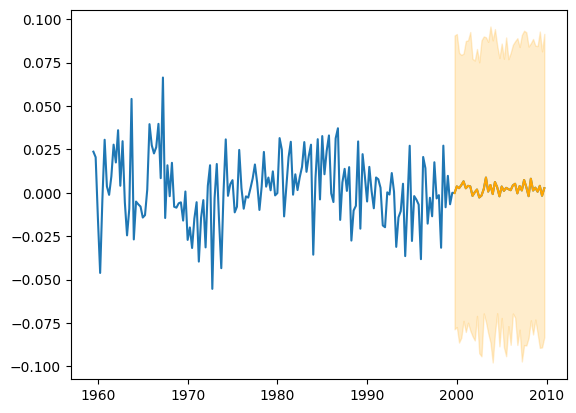

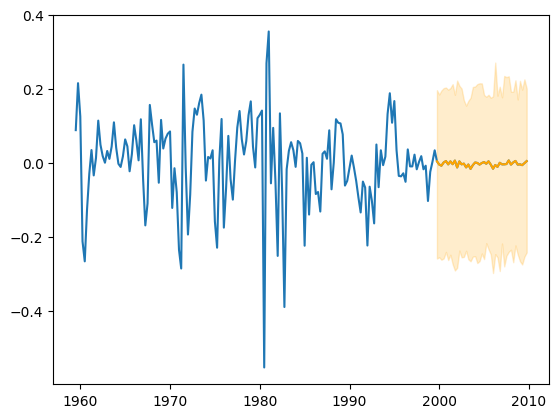

In [10]:
regr.plot("realgovt")
regr.plot("tbilrate")

## **2 - 2 - VAR**

In [11]:
model = VAR(df_train)
results = model.fit(maxlags=5, ic='aic')
lag_order = results.k_ar
VAR_preds = results.forecast(df_train.values[-lag_order:], df_test.shape[0])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


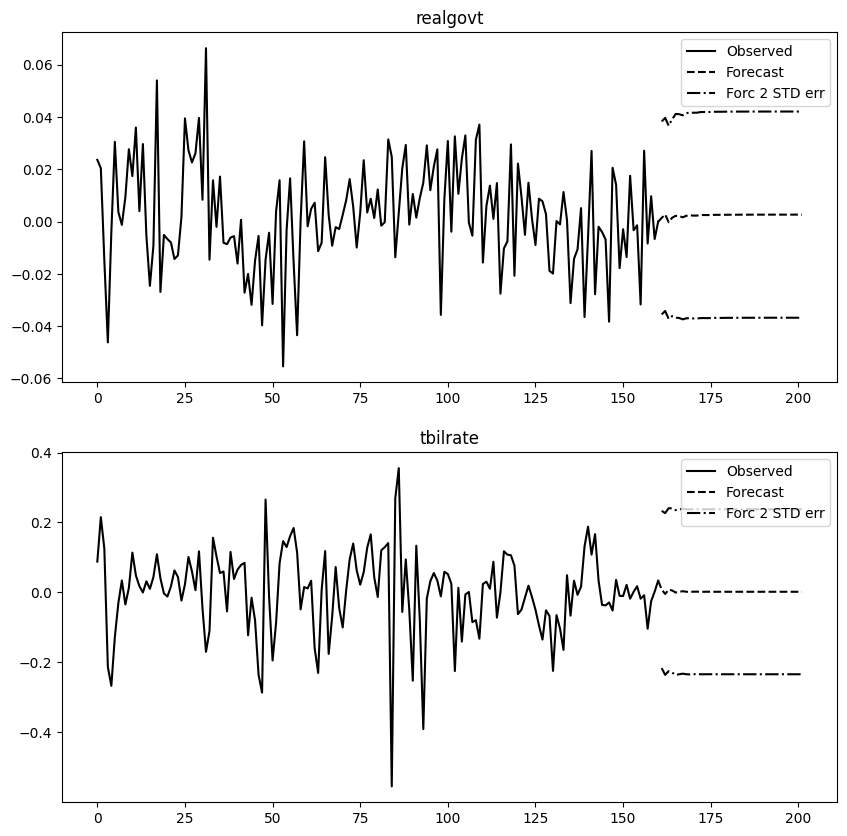

In [12]:
results.plot_forecast(steps = df_test.shape[0]);

## **2 - 3 - VECM**

In [13]:
model = VECM(df_train, k_ar_diff=2, coint_rank=2)
vecm_res = model.fit()
vecm_res.gamma.round(4)
vecm_res.summary()
vecm_res.predict(steps=df_test.shape[0])
forecast, lower, upper = vecm_res.predict(df_test.shape[0], 0.05)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


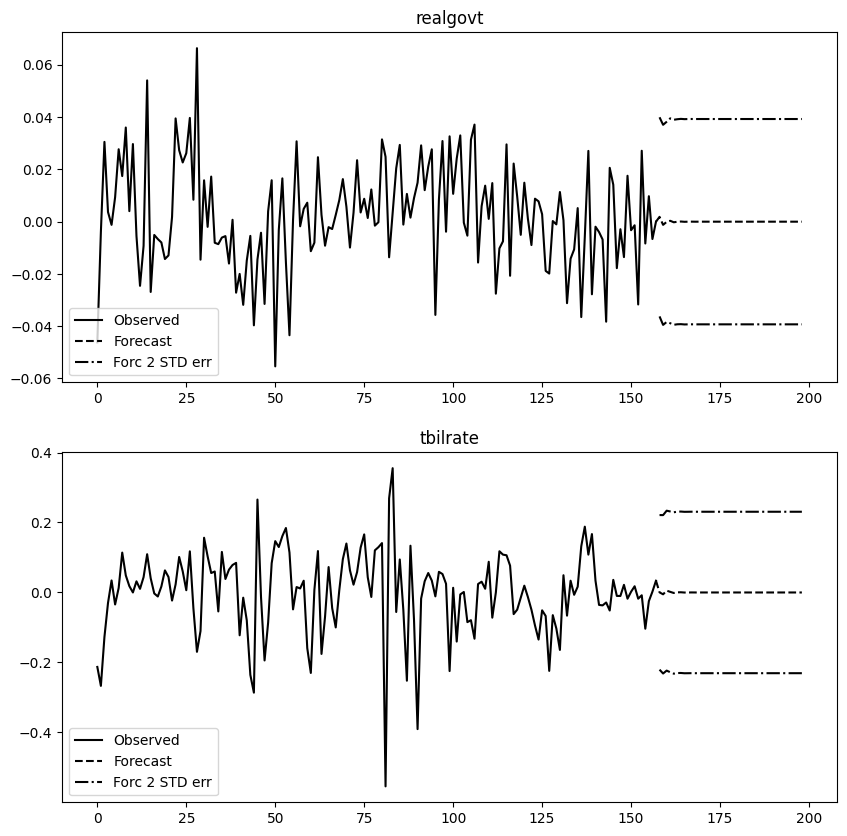

In [14]:
vecm_res.plot_forecast(steps = df_test.shape[0])

out-of-sample errors

In [15]:
display([("nnetsauce.MTS+"+models.index[i], models["RMSE"].iloc[i]) for i in range(3)])
display(('VAR', mean_squared_error(df_test.values, VAR_preds, squared=False)))
display(('VECM', mean_squared_error(df_test.values, forecast, squared=False)))

[('nnetsauce.MTS+DeepMTS(LinearRegression)', 0.21583549257143203),
 ('nnetsauce.MTS+DeepMTS(TransformedTargetRegressor)', 0.21583549257143203),
 ('nnetsauce.MTS+DeepMTS(PassiveAggressiveRegressor)', 0.21634813014873555)]

('VAR', 0.22128770514262763)

('VECM', 0.22170093788693065)